1) Load Data:
    Feature Engineering with Weather Data

In [37]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import math as m

In [5]:
# Ruta al archivo CSV
file_path = file_path = r'C:\Users\asanchezbelb\Desktop\WAREHOUSE\data_jena_climate_2009_2016\jena_climate_2009_2016.csv'

# Cargar el archivo CSV en un DataFrame

df = pd.read_csv(file_path, header=0, index_col=0)

df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


Fecha y hora: Referencia de fecha y hora en el formato dd.mm.aaaa hh:mm:ss.

p (mbar): 996.52 mbar (milibar). El milibar es la unidad derivada del SI de presión utilizada para cuantificar la presión interna. Los informes meteorológicos suelen indicar la presión atmosférica en milibares.

T (degC): -8.02 grados Celsius. La temperatura en grados Celsius.

Tpot (K): 265.4 Kelvin. La temperatura en grados Kelvin.

Tdew (degC): -8.9 grados Celsius. La temperatura en grados Celsius en relación con la humedad. El punto de rocío es una medida de la cantidad absoluta de agua en el aire; el punto de rocío es la temperatura a la cual el aire no puede retener toda la humedad y el agua se condensa.

rh (%): 93.3%. La humedad relativa es una medida de cuán saturado está el aire con vapor de agua; el %HR determina la cantidad de agua contenida en objetos de colección.

VPmax (mbar): 3.33 mbar. La presión de vapor de saturación.

VPact (mbar): 3.11 mbar. La presión de vapor.

VPdef (mbar): 0.22 mbar. La deficiencia de presión de vapor.

sh (g/kg): 1.94 g/kg. La humedad específica.

H2OC (mmol/mol): 3.12 mmol/mol. La concentración de vapor de agua.

rho (g/m^3): 1307.75 g/m^3. Densidad del aire.

wv (m/s): 1.03 m/s. Velocidad del viento.

max. wv (m/s): 1.75 m/s. Velocidad máxima del viento.

wd (deg): 152.3 grados. Dirección del viento en grados.

In [6]:
def report(df):
    print("Nulos en el DataFrame:")
    print(df.isnull().sum())
    
    print("\nForma del DataFrame:")
    print(df.shape)
    
    print("\nTipos de datos en el DataFrame:")
    print(df.dtypes)
    
    print("\nDescripción del DataFrame:")
    print(df.describe().T)


report(df)

Nulos en el DataFrame:
p (mbar)           0
T (degC)           0
Tpot (K)           0
Tdew (degC)        0
rh (%)             0
VPmax (mbar)       0
VPact (mbar)       0
VPdef (mbar)       0
sh (g/kg)          0
H2OC (mmol/mol)    0
rho (g/m**3)       0
wv (m/s)           0
max. wv (m/s)      0
wd (deg)           0
dtype: int64

Forma del DataFrame:
(420551, 14)

Tipos de datos en el DataFrame:
p (mbar)           float64
T (degC)           float64
Tpot (K)           float64
Tdew (degC)        float64
rh (%)             float64
VPmax (mbar)       float64
VPact (mbar)       float64
VPdef (mbar)       float64
sh (g/kg)          float64
H2OC (mmol/mol)    float64
rho (g/m**3)       float64
wv (m/s)           float64
max. wv (m/s)      float64
wd (deg)           float64
dtype: object

Descripción del DataFrame:
                    count         mean        std      min      25%      50%  \
p (mbar)         420551.0   989.212776   8.358481   913.60   984.20   989.58   
T (degC)         42055

In [28]:
NUMERIC = [
"p (mbar)",          
"T (degC)",           
"Tpot (K)",           
"Tdew (degC)",        
"rh (%)",             
"VPmax (mbar)",       
"VPact (mbar)",      
"VPdef (mbar)",     
"sh (g/kg)",         
"H2OC (mmol/mol)",   
"rho (g/m**3)",      
"wv (m/s)",           
"max. wv (m/s)",      
"wd (deg)",
          ]
CATEGORICAL = ""
ID = ""
DATETIME = ["Date Time"]

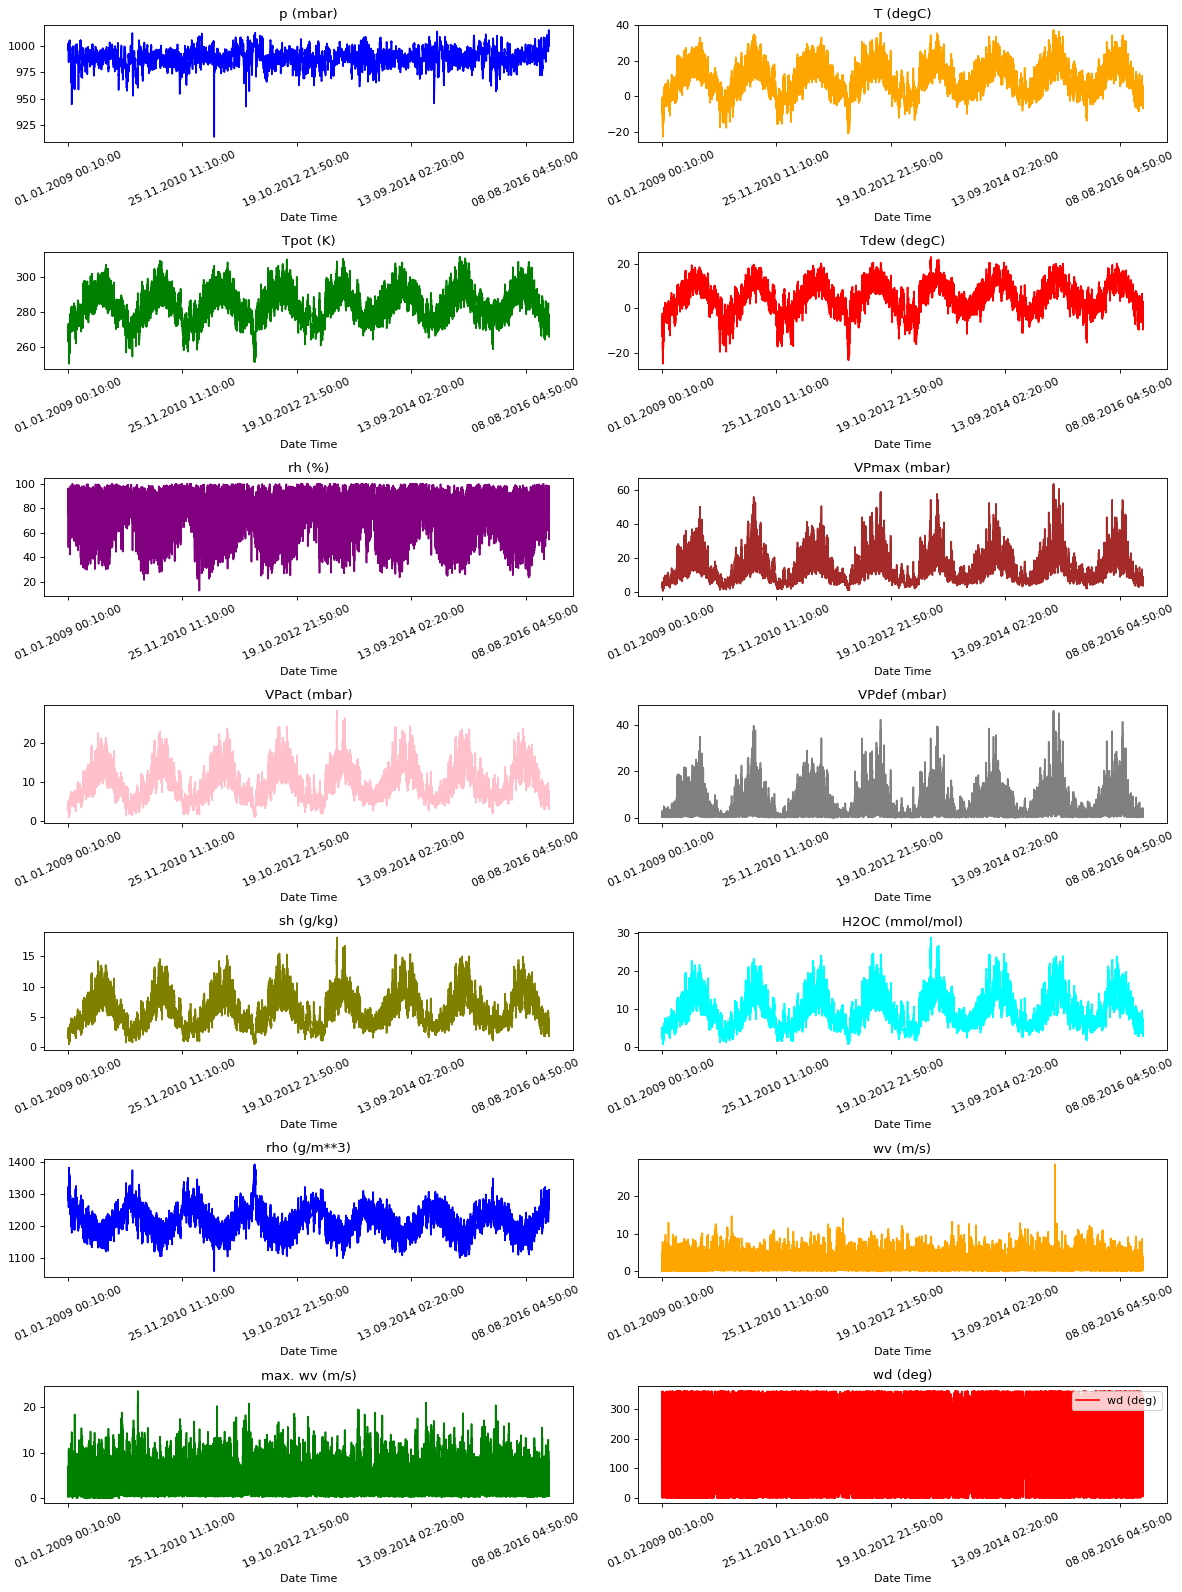

In [19]:
colors = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
]

# Plots each column as a time series
def visualize_plots(dataset, columns):
    # Selecciona las características específicas del conjunto de datos.
    features = dataset[columns]
    
    # Crea una figura y un conjunto de subgráficos con un diseño determinado.
    fig, axes = plt.subplots(
        nrows=len(columns)//2 + len(columns)%2, ncols=2, figsize=(15, 20), dpi=80, facecolor="w", edgecolor="k"
    )
    
    # Realiza un bucle a través de las columnas proporcionadas.
    for i, col in enumerate(columns):
        # Selecciona un color específico para cada iteración.
        c = colors[i % (len(colors))]
        
        # Selecciona los datos de la columna específica.
        t_data = dataset[col]
        
        # Asigna los índices del conjunto de datos a los índices de los datos de la columna.
        t_data.index = dataset.index
        
        # Imprime los primeros datos de la columna.
        t_data.head()
        
        # Grafica los datos en un eje específico con un color específico y un título específico.
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{}".format(col),
            rot=25,
        )
    
    # Agrega una leyenda a la gráfica.
    ax.legend([col])
    
    # Ajusta automáticamente los parámetros del subtrazado para que se ajusten a la figura.
    plt.tight_layout()

# Visualize the dataset
visualize_plots(df, NUMERIC)

In [12]:
# Set the wind velocity outliers to 0
wv = df['wv (m/s)']
bad_wv = wv == -9999.0
wv[bad_wv] = 0.0

# Set the max wind velocity outliers to 0
max_wv = df['max. wv (m/s)']
bad_max_wv = max_wv == -9999.0
max_wv[bad_max_wv] = 0.0

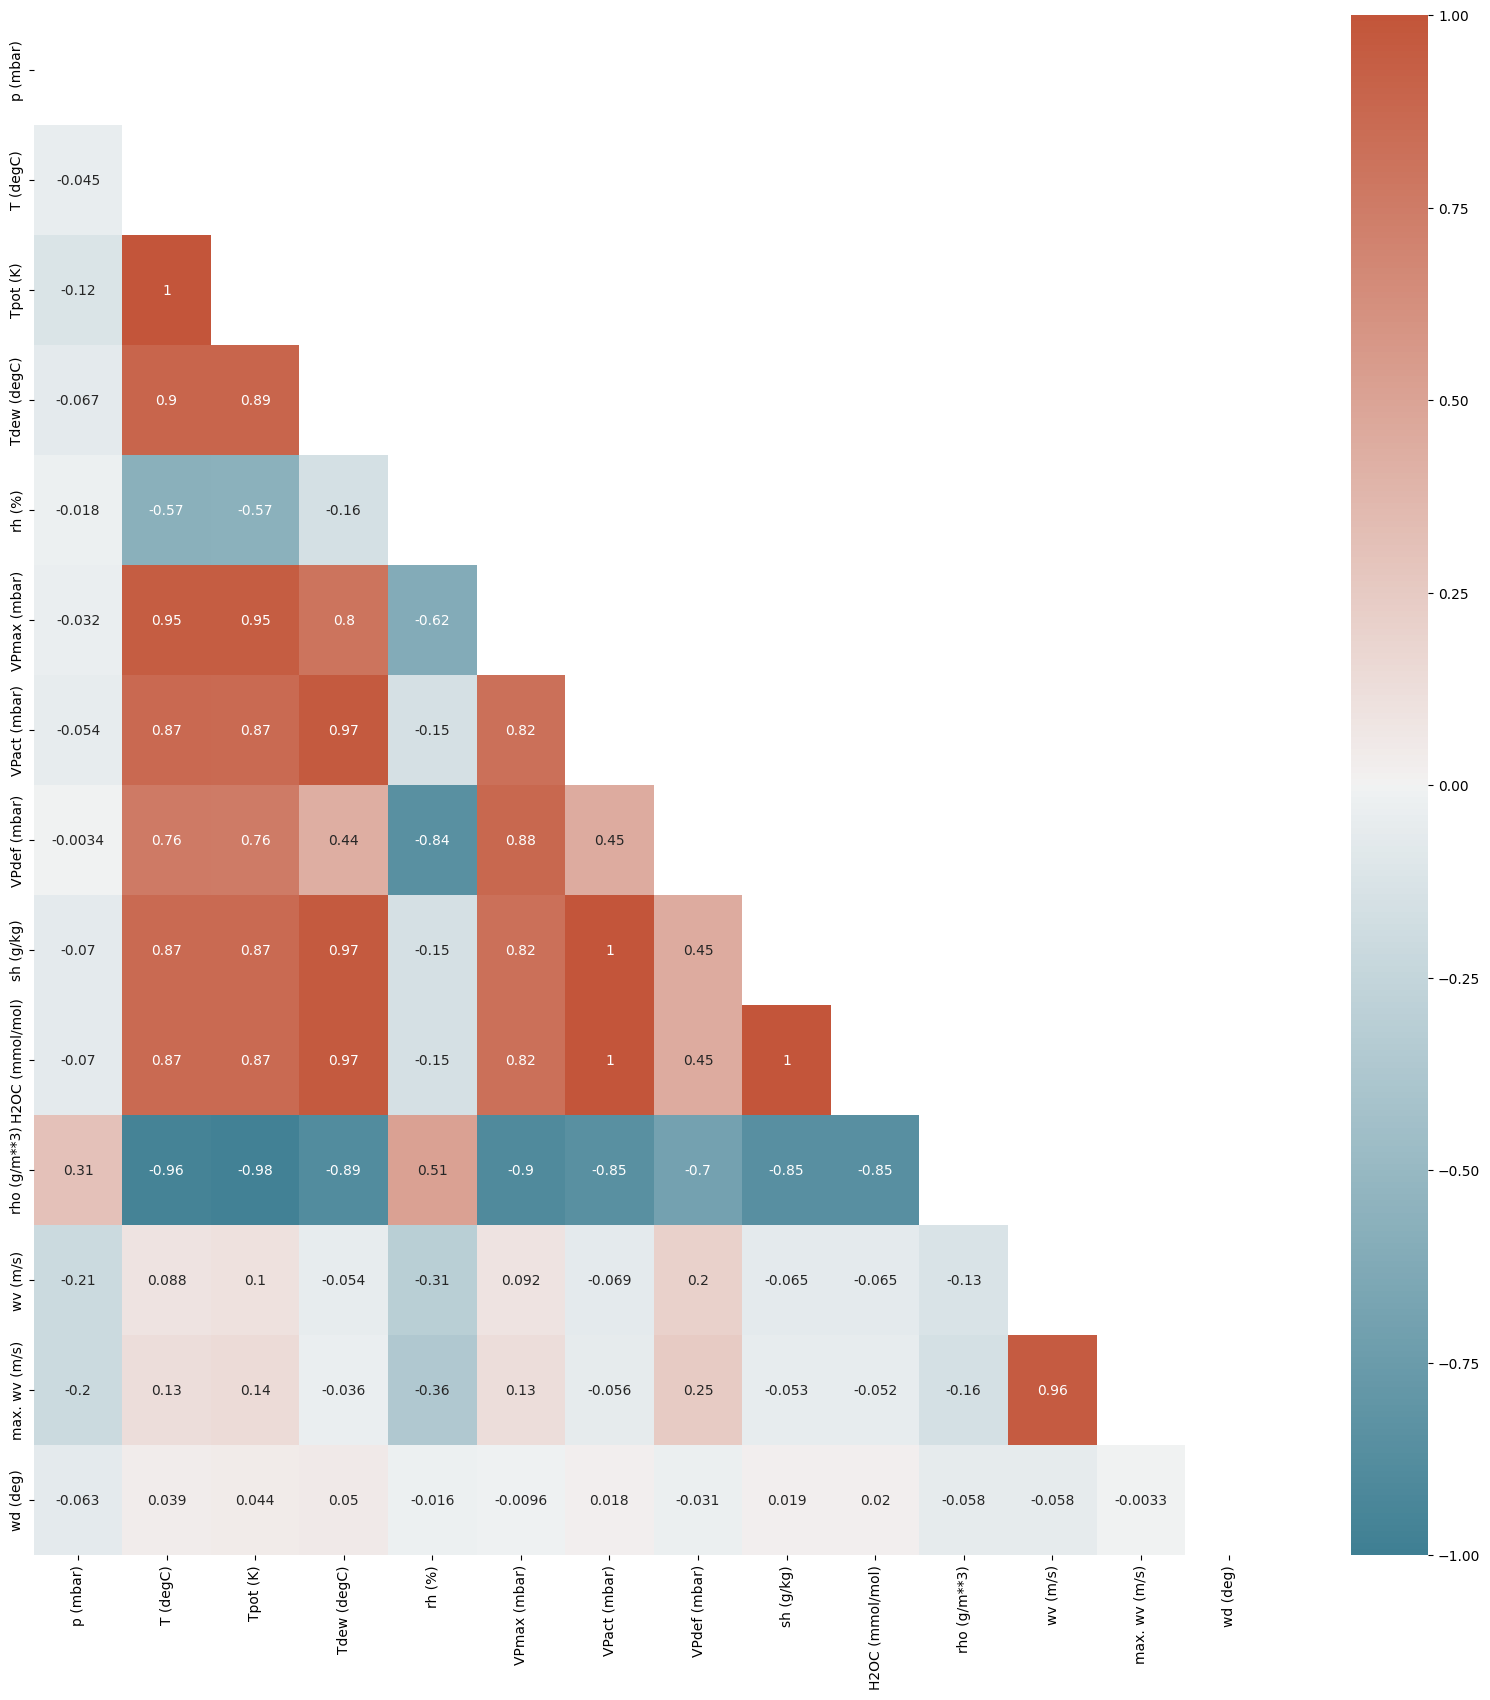

In [18]:
def show_correlation_heatmap(dataframe):
    plt.figure(figsize=(20, 20))
    cor = dataframe.corr()
    mask = np.triu(np.ones_like(cor, dtype=bool))
    cmap = sns.diverging_palette(220, 20, as_cmap=True)
    cmap.set_over('red')  # Para valores superiores a 0.85
    cmap.set_under('red')  # Para valores inferiores a -0.85
    sns.heatmap(cor, annot=True, cmap=cmap, mask=mask, center=0, vmin=-1, vmax=1)
    plt.show()

show_correlation_heatmap(df)








In [ ]:
FEATURES_TO_REMOVE = [          
"Tpot (K)",           
"Tdew (degC)",                     
"VPmax (mbar)",       
"rho (g/m**3)",      
          ]

In [ ]:
#GENERACION DE VARIABLES: Crear Fuerzas de viento y patrones diarios y estacionales:
# variables de dirección de viento con fuerza de viento
# variables de tiempo con temperaturas mas bajas y temporadas de tifones

In [33]:
columnas = NUMERIC + DATETIME
print(columnas)
date_time_idx = columnas.index(DATETIME[0])
print(f'El indice de Date Time es: {date_time_idx}')
wv_idx = columnas.index('wv (m/s)')
print(f'El indice de Date Time es: {wv_idx}')

['p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)', 'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)', 'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)', 'wd (deg)', 'Date Time']
El indice de Date Time es: 14
El indice de Date Time es: 11


In [36]:
def clean_fn(line):
    '''
    Convierte cadenas de fecha y hora en formato CSV a marcas de tiempo de Unix y elimina valores atípicos
    en la columna de velocidad del viento. Se utiliza como parte del
    proceso de transformación.

    Args:
        line (string) - una fila de un archivo CSV

    Returns:

    '''
    # Split the CSV string to a list
    line_split = line.split(b',')

    # Decodes the timestamp string to utf-8
    date_time_string = line_split[date_time_idx].decode("utf-8")

    # Creates a datetime object from the timestamp string
    date_time = datetime.strptime(date_time_string, '%d.%m.%Y %H:%M:%S')

    # Generates a timestamp from the object
    timestamp = datetime.timestamp(date_time)

    # Overwrites the string timestamp in the row with the timestamp in seconds
    line_split[date_time_idx] = bytes(str(timestamp), 'utf-8')

    # Check if wind velocity is an outlier
    if line_split[wv_idx] == b'-9999.0':

        # Overwrite with default value of 0
        line_split[wv_idx] = b'0.0'

    # rejoin the list item into one string
    mod_line = b','.join(line_split)

    return mod_line

# clean_fn(line)